In [247]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [249]:
#data processing

In [250]:
df = pd.read_csv('potentially_abuse_V2.csv',encoding='unicode_escape')

In [251]:
df.head()

,label,selftext,role
0,1,However my stepfather was intoxicated and ass...,perpetrator
1,1,I (27f) have recently escaped an abusive relat...,victim
2,1,Is anyone aware of an online support group for...,victim
3,1,Has anyone had to show up for the abuser__ con...,victim
4,1,There was a fair amount of financial abuse in...,witness


In [252]:
# drop unnecessary columns
df = df.drop(["role"], axis=1)

In [253]:
df.head()

,label,selftext
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [254]:
# rename columns to something better
df.columns = ['labels', 'data']

In [255]:
df.head()

,labels,data
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [256]:
df["label_numerics"]= df["labels"]
Y = df["label_numerics"].values

In [257]:
df

,labels,data,label_numerics
0,1,However my stepfather was intoxicated and ass...,1
1,1,I (27f) have recently escaped an abusive relat...,1
2,1,Is anyone aware of an online support group for...,1
3,1,Has anyone had to show up for the abuser__ con...,1
4,1,There was a fair amount of financial abuse in...,1
...,...,...,...
995,0,He told me that he would NEVER lay a finger o...,0
996,0,But he told me that he has a problem with alc...,0
997,0,The first time he Was drunk and I pissed him ...,0
998,1,He dragged me down my hallway into my garage,1


In [258]:
df['b_labels'] = df['labels']
Y = df['b_labels'].values

In [259]:
#TRAIN TEST SPLIT

In [260]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.2)

In [261]:
max_words=2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [262]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [263]:
sequences_train

[[6, 118, 10, 512, 352, 4, 65, 663, 253, 4, 664, 2, 6, 102, 9, 4, 1023],
 [254, 41, 141, 9, 56, 353, 21, 57, 227, 5, 119, 23, 45],
 [414, 25, 276, 127, 61, 1, 69, 26, 9, 4, 23, 255],
 [8, 134, 16, 158, 103, 78, 256],
 [1, 91, 104, 66, 70, 3, 228, 21, 83, 513],
 [150,
  59,
  1,
  193,
  665,
  92,
  13,
  6,
  33,
  15,
  142,
  3,
  7,
  12,
  4,
  65,
  2,
  12,
  4,
  277,
  54,
  514,
  185,
  5,
  213,
  71],
 [4, 105, 14, 1024, 7, 13, 42, 48, 3, 47, 79, 24, 414, 229],
 [1025, 5, 1026, 9, 86, 1, 1027, 3, 194],
 [1, 278, 8, 11, 38, 415, 257, 24, 42, 6, 55, 8, 67, 228, 128, 195, 7],
 [1,
  5,
  354,
  76,
  176,
  666,
  54,
  69,
  83,
  38,
  23,
  45,
  39,
  1,
  11,
  416,
  2,
  4,
  90,
  11,
  355],
 [1,
  11,
  667,
  230,
  668,
  2,
  106,
  3,
  279,
  143,
  41,
  1,
  151,
  417,
  49,
  143,
  79,
  1028,
  1029],
 [34, 3, 144, 5, 1030],
 [1,
  11,
  418,
  1031,
  83,
  5,
  515,
  2,
  34,
  5,
  196,
  1032,
  31,
  1033,
  42,
  7,
  669,
  1034,
  8,
  11,
  37,


In [264]:
sequences_test

[[4, 1460, 84, 11, 4, 2, 8, 514, 185, 10],
 [4, 72, 2, 958, 82, 511, 3, 98, 7, 47, 4, 374, 2, 6, 296, 2, 144],
 [371,
  43,
  69,
  83,
  38,
  658,
  2,
  16,
  437,
  3,
  240,
  8,
  1715,
  5,
  2,
  547,
  16,
  42,
  7,
  2,
  100,
  5,
  212,
  318,
  256,
  8,
  510,
  6,
  526,
  318,
  43,
  156,
  560],
 [1, 17, 38, 23, 419, 161, 10, 31, 1874, 2, 5, 675, 81, 10, 18, 1460],
 [43, 138, 560, 100, 8, 232, 7, 2, 1, 405, 13, 177],
 [53, 900, 40, 8, 11, 4, 404, 167],
 [1362, 67, 31, 728, 20, 7, 24, 27, 25, 120, 23, 13, 6, 189, 174, 32, 59],
 [1,
  11,
  483,
  41,
  224,
  27,
  28,
  200,
  1863,
  12,
  33,
  49,
  5,
  1162,
  870,
  15,
  36,
  88,
  29,
  47,
  10,
  1863,
  13,
  273,
  148,
  122,
  134,
  29,
  1,
  205,
  69,
  79,
  4,
  401,
  1,
  221,
  68,
  66,
  77,
  1572,
  11,
  24,
  1,
  11,
  2,
  157,
  110,
  148,
  11,
  35,
  2,
  36,
  106,
  7,
  3,
  267,
  4,
  2,
  178,
  2,
  36,
  505,
  20,
  42,
  16,
  2,
  41,
  230,
  554,
  221,
  279,
  13,
 

In [265]:
tokenizer.word_docs

defaultdict(int,
            {'nieces': 1,
             'my': 311,
             'ex': 33,
             'the': 225,
             'of': 174,
             'person': 17,
             "isn't": 5,
             'than': 8,
             'father': 20,
             'rather': 2,
             'sisters': 2,
             'question': 3,
             'and': 344,
             'in': 161,
             'if': 47,
             'leaving': 9,
             'experienced': 4,
             'physically': 19,
             'you': 25,
             'after': 39,
             'a': 240,
             'this': 85,
             'any': 15,
             'idk': 8,
             'abusive': 86,
             'relationship': 46,
             '8': 7,
             'been': 73,
             'its': 4,
             'marriage': 8,
             'out': 67,
             'i': 416,
             'days': 18,
             'since': 36,
             'got': 31,
             'later': 8,
             '2': 21,
             'he': 175,
             'it': 9

In [266]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

2122

In [267]:
#Pad TRAIN DATA sequences with max length T 

In [268]:
data_train = pad_sequences(sequences_train)

In [269]:
data_train

array([[   0,    0,    0, ...,    9,    4, 1023],
       [   0,    0,    0, ...,  119,   23,   45],
       [   0,    0,    0, ...,    4,   23,  255],
       ...,
       [   0,    0,    0, ...,   79,  105,  750],
       [   0,    0,    0, ...,  213,  176,  620],
       [   0,    0,    0, ...,  448,   10,    3]], dtype=int32)

In [270]:
data_train.shape

(800, 631)

In [271]:
T= data_train.shape[1]

In [272]:
T

631

In [273]:
#Pad TEST DATA sequences with max length T

In [274]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [275]:
data_test

array([[  0,   0,   0, ..., 514, 185,  10],
       [  0,   0,   0, ..., 296,   2, 144],
       [  0,   0,   0, ...,  43, 156, 560],
       ...,
       [  0,   0,   0, ...,   3,  44,  23],
       [  0,   0,   0, ...,   5, 954,  45],
       [  0,   0,   0, ...,  19,  79, 227]], dtype=int32)

In [276]:
data_train.shape

(800, 631)

In [277]:
data_test.shape

(200, 631)

In [278]:
data_train.shape[1]

631

In [279]:
V= len(tokenizer.word_docs)
T = data_train.shape[1] #features

In [280]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [281]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) #return word vectors 
x = LSTM(M, return_sequences=True)(x) 
x = GlobalMaxPooling1D()(x)  #long term dependancies
x = Dense(1, activation='sigmoid')(x) #binary

model = Model(i, x)
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 631)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 631, 20)           42460     
                                                                 
 lstm_21 (LSTM)              (None, 631, 15)           2160      
                                                                 
 global_max_pooling1d_21 (Gl  (None, 15)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_21 (Dense)            (None, 1)                 16        
                                                                 
Total params: 44,636
Trainable params: 44,636
Non-trainable params: 0
______________________________________________________

In [282]:
#COMPILE THE MODEL

In [285]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=15,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/15
25/25 [==============================] - 4s 102ms/step - loss: 0.2131 - accuracy: 0.9613 - val_loss: 0.5251 - val_accuracy: 0.8150
Epoch 2/15
25/25 [==============================] - 2s 91ms/step - loss: 0.1822 - accuracy: 0.9663 - val_loss: 0.5128 - val_accuracy: 0.8150
Epoch 3/15
25/25 [==============================] - 2s 92ms/step - loss: 0.1635 - accuracy: 0.9663 - val_loss: 0.4908 - val_accuracy: 0.8150
Epoch 4/15
25/25 [==============================] - 2s 92ms/step - loss: 0.1514 - accuracy: 0.9663 - val_loss: 0.5071 - val_accuracy: 0.8150
Epoch 5/15
25/25 [==============================] - 2s 93ms/step - loss: 0.1307 - accuracy: 0.9762 - val_loss: 0.5200 - val_accuracy: 0.8150
Epoch 6/15
25/25 [==============================] - 2s 92ms/step - loss: 0.1222 - accuracy: 0.9800 - val_loss: 0.5453 - val_accuracy: 0.8000
Epoch 7/15
25/25 [==============================] - 2s 93ms/step - loss: 0.1072 - accuracy: 0.9800 - val_loss: 0.5285 - val_accuracy: 0

In [286]:
import matplotlib.pyplot as plt

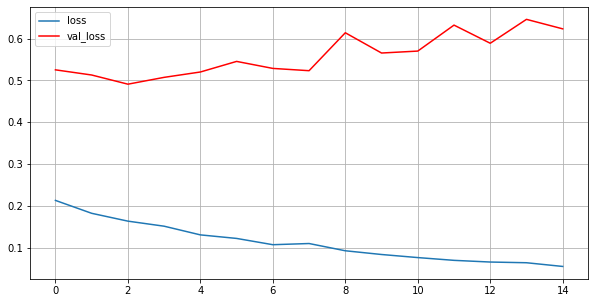

In [287]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

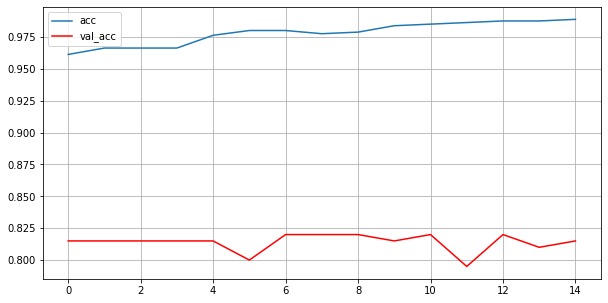

In [288]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [289]:
#LETS PREDICT IT .. FUN PART

In [290]:
#Reset the index in test data

In [291]:
df_test

501      my late husband was my soulmate and he passe...
385     My mother and stepfather are coming to help m...
327       Today we got into an argument and it escala...
535    I have an abusive older brother (in his early ...
826     We started arguing then he choked me and I co...
                             ...                        
531      I don't know where else to spill these feelings
156       I told him I've been getting sexually abuse...
513     I want to take some action against him but my...
544     I am a 22 year old girl and my last relations...
62     I know there easy answer is to block him but m...
Name: data, Length: 200, dtype: object

In [292]:
df_test2=df_test.reset_index()

In [293]:
df_test2=df_test2.drop(columns=["index"])

In [294]:
df_test2.shape

(200, 1)

In [295]:
#exploration

In [296]:
df_test2.loc[38]

data    Hi guys
Name: 38, dtype: object

In [297]:
df_test2.loc[38][0]

'Hi guys'

In [298]:
Ytest.shape

(200,)

In [299]:
Ytest[38]

0

In [300]:
#indexes for all the spam

In [301]:
np.where(Ytest==1)

(array([  1,   2,   3,   4,   6,   8,   9,  14,  15,  22,  24,  25,  28,
         30,  32,  37,  40,  44,  45,  46,  49,  50,  51,  52,  53,  56,
         59,  61,  64,  66,  67,  68,  71,  72,  73,  74,  76,  77,  80,
         81,  83,  87,  89,  91,  92,  94,  99, 100, 102, 105, 106, 107,
        108, 109, 110, 114, 121, 122, 123, 124, 127, 129, 130, 134, 136,
        138, 139, 142, 147, 149, 150, 151, 155, 157, 158, 161, 166, 167,
        172, 173, 176, 177, 178, 180, 181, 182, 184, 185, 186, 189, 191,
        192, 196, 197, 199]),)

In [302]:
Ytest[45]

1

In [304]:
df_test2.loc[1]

data     My mother and stepfather are coming to help m...
Name: 1, dtype: object